In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

In [4]:
def PolynomialRegression(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))

In [5]:
#This function genrates data for our Model.
def make_data(N, err = 1.0, rseed = 1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

In [6]:
#Create Data to Fit Our Model:

In [7]:
X, y = make_data(40)

In [8]:
##Visualize the Data

In [9]:
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

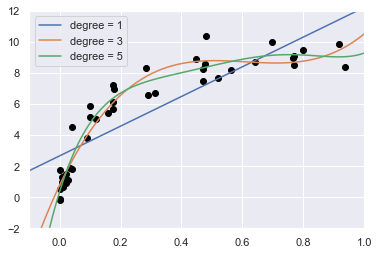

In [10]:
plt.scatter(X.ravel(), y, color = 'black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label = 'degree = {0}'.format(degree))
    
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc = 'best');

In [11]:
##Plot Validation Curves:

In [12]:
degree = np.arange(0, 21) #Define x axis ticks for plot.

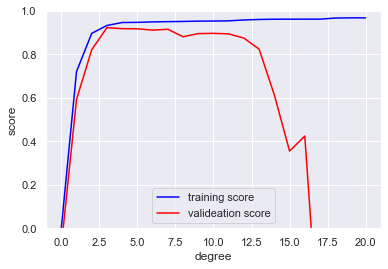

In [13]:
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                         'polynomialfeatures__degree', degree, cv = 7)
plt.plot(degree, np.median(train_score, 1), color = 'blue', label = 'training score')
plt.plot(degree, np.median(val_score, 1), color = 'red', label = 'valideation score')
plt.legend(loc = 'best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

In [14]:
##Compute and Display the Fit over the Original Data

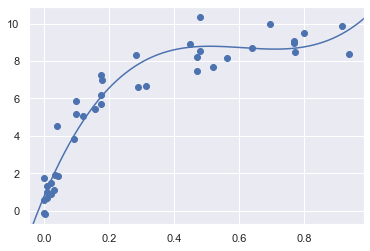

In [15]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

In [16]:
#Learning Curves

In [17]:
#Generate a new dataset.
X2, y2 = make_data(200)

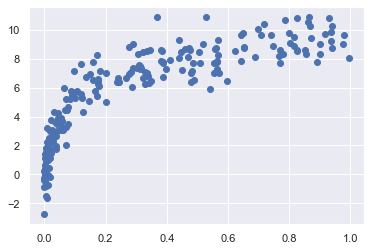

In [18]:
#Visualize the data.
plt.scatter(X2.ravel(), y2)

In [19]:
#Plot the validation curves.

In [20]:
degree = np.arange(21) #Create markings for 

In [21]:
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                         'polynomialfeatures__degree', 
                                            degree, cv = 7)

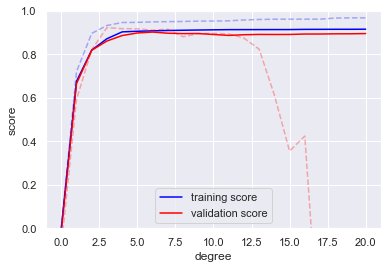

In [22]:
plt.plot(degree, np.median(train_score2, 1), color = 'blue', label = 'training score')
plt.plot(degree, np.median(val_score2, 1), color = 'red', label = 'validation score')
plt.plot(degree, np.median(train_score, 1), color = 'blue', alpha = 0.3, linestyle = 'dashed')
plt.plot(degree, np.median(val_score, 1), color = 'red', alpha = 0.3, linestyle = 'dashed')
plt.legend(loc = 'lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

In [23]:
#Plot the validation curves with learning_curve:

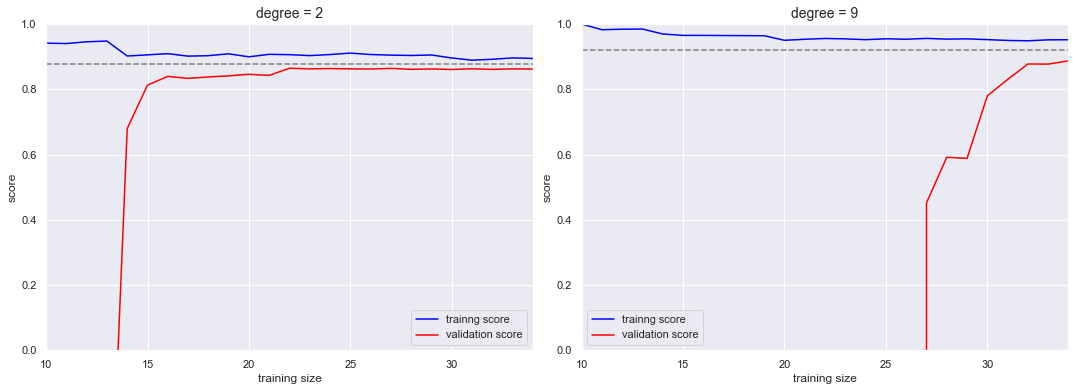

In [24]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
fig.subplots_adjust(left = 0.0625, right = 0.95, wspace = 0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                        X, y, cv = 7,
                                        train_sizes = np.linspace(0.3, 1, 25))
    
    ax[i].plot(N, np.mean(train_lc, 1), color = 'blue', label = 'trainng score')
    ax[i].plot(N, np.mean(val_lc, 1), color = 'red', label = 'validation score')
    ax[i].hlines(np.mean([train_lc[-1], 
                          val_lc[-1]]), N[0], N[-1], color = 'gray',
                         linestyle = 'dashed')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size = 14)
    ax[i].legend(loc = 'best')

In [25]:
##User Grid Search:

In [30]:

param_grid = {'polynomialfeatures__degree': np.arange(21),
             'linearregression__fit_intercept': [True, False],
             'linearregression__normalize': [True, False]}

In [31]:
grid = GridSearchCV(PolynomialRegression(),
                   param_grid,
                   cv = 7)

In [32]:

grid.fit(X, y);

In [33]:
model = grid.best_estimator_

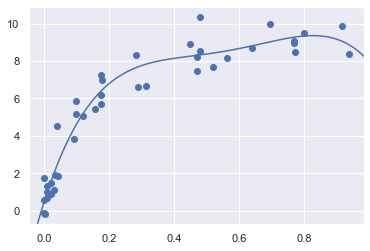

In [41]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);